In [21]:
#For Data Handling
import pandas as pd
import numpy as np
#For Data Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#For the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# **Data Explore with Data Preprocessing**

In [2]:
df = pd.read_csv('/content/heart_disease_data (1).csv')

In [3]:
df

,Age,Gender,Cholesterol,BloodPressure,MaxHeartRate,Exercise,Smoking,FamilyHistory,Risk
0,58.0,Male,283.0,111.0,NaN,No,Yes,No,1
1,71.0,Male,225.0,125.0,162.0,No,NaN,No,0
2,NaN,Male,233.0,112.0,159.0,No,No,No,0
3,34.0,Male,236.0,152.0,163.0,Yes,No,Yes,0
4,62.0,Male,307.0,115.0,191.0,NaN,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
9995,67.0,Female,219.0,154.0,123.0,Yes,NaN,No,0
9996,42.0,Male,264.0,165.0,167.0,No,No,No,0
9997,25.0,Male,310.0,93.0,133.0,No,No,No,0
9998,70.0,Female,245.0,114.0,144.0,No,NaN,Yes,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            9500 non-null   float64
 1   Gender         9500 non-null   object 
 2   Cholesterol    9500 non-null   float64
 3   BloodPressure  9500 non-null   float64
 4   MaxHeartRate   9500 non-null   float64
 5   Exercise       9500 non-null   object 
 6   Smoking        9500 non-null   object 
 7   FamilyHistory  9500 non-null   object 
 8   Risk           10000 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB
None


# **Data Cleaning**

Handle missing values

In [5]:
print(df.isnull().sum())

Age              500
Gender           500
Cholesterol      500
BloodPressure    500
MaxHeartRate     500
Exercise         500
Smoking          500
FamilyHistory    500
Risk               0
dtype: int64


In [6]:
# Impute missing values for 'Age' with the mean
if df['Age'].isnull().any():
    df['Age'].fillna(df['Age'].mean(), inplace=True)



/tmp/ipython-input-2566549407.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
# Clean 'Gender' column
if df['Gender'].isnull().any():
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Clean 'Exercise' column
if df['Exercise'].isnull().any():
    df['Exercise'].fillna(df['Exercise'].mode()[0], inplace=True)

# Clean 'Smoking' column
if df['Smoking'].isnull().any():
    df['Smoking'].fillna(df['Smoking'].mode()[0], inplace=True)

# Clean 'FamilyHistory' column
if df['FamilyHistory'].isnull().any():
    df['FamilyHistory'].fillna(df['FamilyHistory'].mode()[0], inplace=True)

# Check if there are any remaining missing values in these columns
print(df[['Gender', 'Exercise', 'Smoking', 'FamilyHistory']].isnull().sum())

Gender           0
Exercise         0
Smoking          0
FamilyHistory    0
dtype: int64


/tmp/ipython-input-4177508943.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-4177508943.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [10]:
# Impute missing values for 'Cholesterol' with the median
if df['Cholesterol'].isnull().any():
    df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

# Check if there are any remaining missing values in 'Cholesterol'
print(df['Cholesterol'].isnull().sum())

0


/tmp/ipython-input-148035019.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


In [14]:
# Impute missing values in 'BloodPressure' based on the median within each 'Gender' group
if df['BloodPressure'].isnull().any():
    df['BloodPressure'] = df.groupby('Gender')['BloodPressure'].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values in 'BloodPressure'
print(df['BloodPressure'].isnull().sum())

0


In [15]:
print(df.isnull().sum())

Age                0
Gender             0
Cholesterol        0
BloodPressure      0
MaxHeartRate     500
Exercise           0
Smoking            0
FamilyHistory      0
Risk               0
dtype: int64


In [16]:
# Impute missing values in 'MaxHeartRate' based on the median within each 'Gender' group
if df['MaxHeartRate'].isnull().any():
    df['MaxHeartRate'] = df.groupby('Gender')['MaxHeartRate'].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values in 'MaxHeartRate'
print(df['MaxHeartRate'].isnull().sum())

0


In [17]:
print(df.isnull().sum())

Age              0
Gender           0
Cholesterol      0
BloodPressure    0
MaxHeartRate     0
Exercise         0
Smoking          0
FamilyHistory    0
Risk             0
dtype: int64


# **Distribution**

In [24]:
# Visualize the distribution of categorical features using Plotly
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    fig_count = px.bar(df, x=col, title=f'Distribution of {col}')
    fig_count.show()

In [23]:


# Visualize the distribution of numerical features using Plotly
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    fig_hist = px.histogram(df, x=col, title=f'Distribution of {col}')
    fig_hist.show()

    fig_box = px.box(df, y=col, title=f'Box Plot of {col}')
    fig_box.show()

Based on the visualizations:

**Categorical Features:**

*   **Gender:** The distribution shows that there are slightly more Male participants than Female participants in the dataset.
*   **Exercise:** The distribution indicates that there are more participants who do not exercise compared to those who do.
*   **Smoking:** The distribution shows that there are more participants who do not smoke compared to those who smoke.
*   **FamilyHistory:** The distribution indicates that there are more participants who do not have a family history of heart disease compared to those who do.

**Numerical Features:**

*   **Age:** The distribution of Age appears to be somewhat spread out, with a peak around the middle age range. The box plot shows the median age and potential outliers.
*   **Cholesterol:** The distribution of Cholesterol seems to be somewhat normally distributed, with a range of values and potential outliers as seen in the box plot.
*   **BloodPressure:** The distribution of BloodPressure shows a range of values, with a concentration around the average blood pressure. The box plot helps to identify the spread and any potential outliers.
*   **MaxHeartRate:** The distribution of MaxHeartRate appears to be somewhat normally distributed, with a range of values and potential outliers as shown in the box plot.
*   **Risk:** The distribution of Risk shows the count of participants with and without the risk of heart disease.

In [25]:
# Investigate the class distribution of the target variable 'Risk'
risk_distribution = df['Risk'].value_counts().reset_index()
risk_distribution.columns = ['Risk', 'Count']

print("Class distribution of 'Risk':")
print(risk_distribution)

# Visualize the class distribution using Plotly
fig_risk = px.bar(risk_distribution, x='Risk', y='Count', title='Distribution of Risk')
fig_risk.show()

Class distribution of 'Risk':
   Risk  Count
0     0   7348
1     1   2652


Based on the visualization of the 'Risk' distribution, we can see the number of participants for each class:

* There are **7348** participants with Risk = 0 (no risk of heart disease).
* There are **2652** participants with Risk = 1 (risk of heart disease).

This indicates that the dataset is **imbalanced**, with significantly more instances of class 0 than class 1. This is an important observation for model building, as it might require techniques to handle imbalanced data during training.

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
categorical_cols = ['Gender', 'Exercise', 'Smoking', 'FamilyHistory']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



,Age,Gender,Cholesterol,BloodPressure,MaxHeartRate,Exercise,Smoking,FamilyHistory,Risk
0,58.000000,1,283.0,111.0,160.0,0,1,0,1
1,71.000000,1,225.0,125.0,162.0,0,1,0,0
2,49.787474,1,233.0,112.0,159.0,0,0,0,0
3,34.000000,1,236.0,152.0,163.0,1,0,1,0
4,62.000000,1,307.0,115.0,191.0,0,1,1,1


In [28]:
df

,Age,Gender,Cholesterol,BloodPressure,MaxHeartRate,Exercise,Smoking,FamilyHistory,Risk
0,58.000000,1,283.0,111.0,160.0,0,1,0,1
1,71.000000,1,225.0,125.0,162.0,0,1,0,0
2,49.787474,1,233.0,112.0,159.0,0,0,0,0
3,34.000000,1,236.0,152.0,163.0,1,0,1,0
4,62.000000,1,307.0,115.0,191.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
9995,67.000000,0,219.0,154.0,123.0,1,1,0,0
9996,42.000000,1,264.0,165.0,167.0,0,0,0,0
9997,25.000000,1,310.0,93.0,133.0,0,0,0,0
9998,70.000000,0,245.0,114.0,144.0,0,1,1,1


In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to normalize (excluding 'Age' if you don't want to normalize it)
numerical_cols_to_normalize = ['Cholesterol', 'BloodPressure', 'MaxHeartRate']

# Apply StandardScaler to the selected numerical columns
df[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

# Display the first few rows of the dataframe with normalized features
display(df.head())

,Age,Gender,Cholesterol,BloodPressure,MaxHeartRate,Exercise,Smoking,FamilyHistory,Risk
0,58.000000,1,0.592377,-0.917584,0.011245,0,1,0,1
1,71.000000,1,-0.435855,-0.366000,0.100386,0,1,0,0
2,49.787474,1,-0.294030,-0.878186,-0.033325,0,0,0,0
3,34.000000,1,-0.240846,0.697770,0.144956,1,0,1,0
4,62.000000,1,1.017852,-0.759989,1.392922,0,1,1,1



## **Exploratory Data Analysis (EDA)**

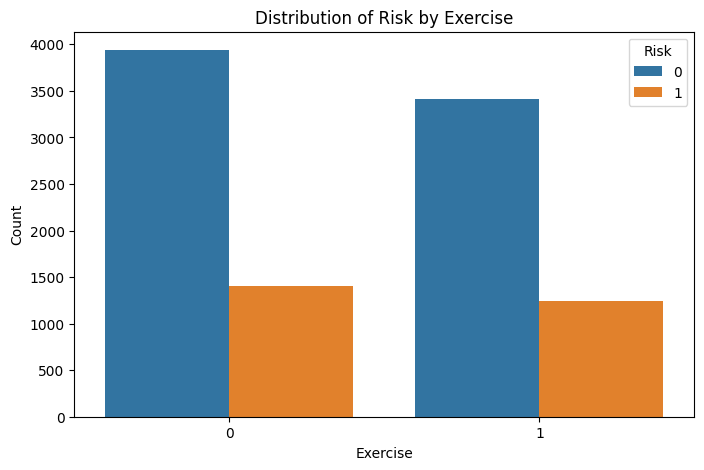

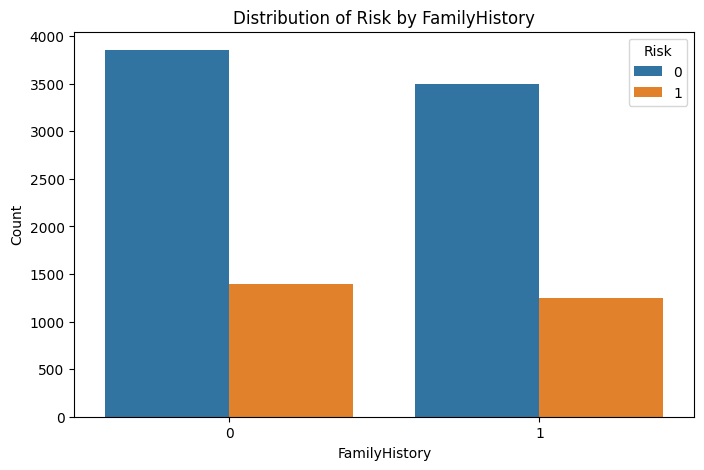

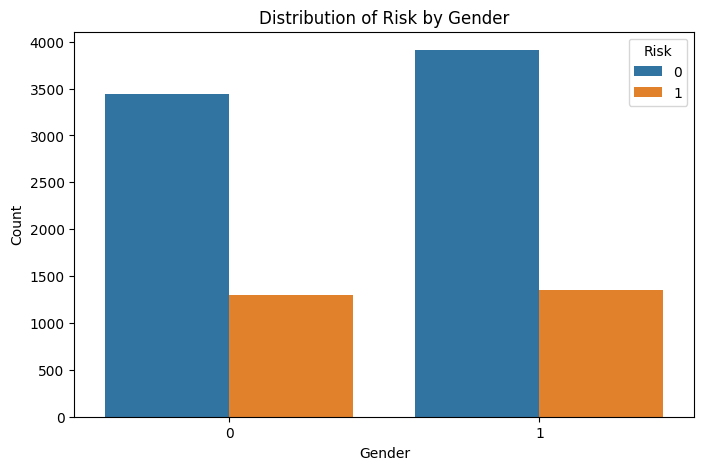

In [40]:


# Bar charts: Show the distribution of Risk across different categories
categorical_cols = ['Exercise', 'FamilyHistory', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Risk', data=df)
    plt.title(f'Distribution of Risk by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Based on the bar charts showing the distribution of Risk across Exercise, Family History, and Gender, here are some patterns and trends related to heart disease risk:

* **Exercise:** We can observe the distribution of Risk for participants who exercise (1) and those who do not (0). This helps us see if there's a noticeable difference in the proportion of individuals with Risk=1 (heart disease risk) between the two groups.

* **Family History:** The chart for Family History shows the distribution of Risk for those with (1) and without (0) a family history of heart disease. We can compare the counts of Risk=1 in these two groups to understand the influence of family history.

* **Gender:** The Gender chart illustrates the distribution of Risk for Male (1) and Female (0) participants. By comparing the proportion of Risk=1 in each gender group, we can identify if one gender appears to have a higher risk of heart disease in this dataset.

By examining the relative heights of the orange bars (Risk=1) compared to the blue bars (Risk=0) within each category of these features, we can infer potential relationships and trends regarding heart disease risk. For example, if the orange bar is significantly higher in one category compared to another, it suggests a higher risk associated with that category.

In [42]:


# Histograms: Visualize the distribution of continuous features
continuous_cols = ['Age', 'Cholesterol', 'BloodPressure', 'MaxHeartRate']

for col in continuous_cols:
    fig_hist = px.histogram(df, x=col, color='Risk', title=f'Distribution of {col} by Risk')
    fig_hist.show()

Based on the histograms of the continuous features colored by 'Risk', here's what we can analyze about patterns and trends influencing the prediction of heart disease risk:

* **Age:** We can observe if there's a tendency for higher risk (Risk 1) to be associated with older ages compared to lower risk (Risk 0). Look at where the peaks of the distributions for Risk 0 and Risk 1 are located along the Age axis.

* **Cholesterol:** Examine if higher Cholesterol levels are more prevalent in the group with heart disease risk (Risk 1) compared to the group without risk (Risk 0). See if the distribution for Risk 1 is shifted towards higher Cholesterol values.

* **BloodPressure:** Analyze if higher Blood Pressure values are more common in individuals with heart disease risk. Compare the distributions of Blood Pressure for Risk 0 and Risk 1.

* **MaxHeartRate:** Look for any noticeable differences in the distribution of Maximum Heart Rate between the two risk groups.

By comparing the shapes and positions of the histograms for Risk 0 and Risk 1 for each continuous feature, we can gain insights into how these factors might influence the likelihood of heart disease.

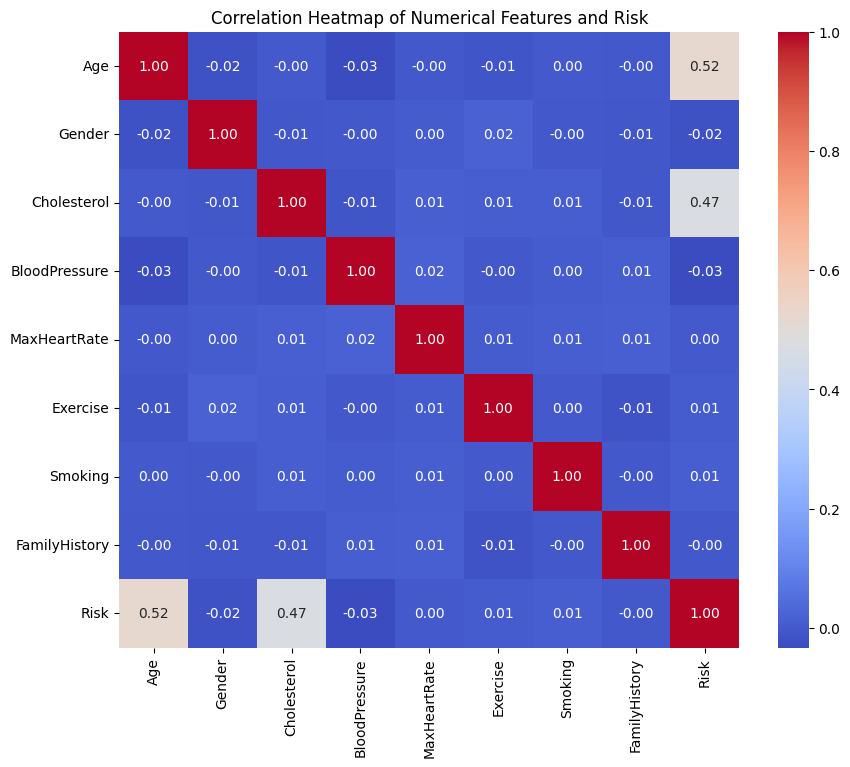

In [44]:
# Calculate the correlation matrix for numerical features and the target variable
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Risk')
plt.show()

Based on the correlation heatmap, we can identify the strength and direction of linear relationships between the numerical features and the target variable 'Risk'.

Here's what we can interpret regarding patterns and trends that can influence the prediction of heart disease risk:

* **Age and Risk:** Age shows a moderately positive correlation with Risk (around 0.52). This suggests that as age increases, the likelihood of heart disease risk also tends to increase. Age appears to be the most correlated feature with Risk among the numerical features.

* **Cholesterol and Risk:** Cholesterol also shows a moderately positive correlation with Risk (around 0.47). This indicates that higher cholesterol levels are associated with an increased risk of heart disease.

* **BloodPressure and Risk:** Blood Pressure has a very weak negative correlation with Risk (around -0.03). This suggests there is almost no linear relationship between blood pressure and heart disease risk in this dataset.

* **MaxHeartRate and Risk:** Max Heart Rate has a very weak positive correlation with Risk (around 0.003). Similar to Blood Pressure, there is negligible linear relationship between max heart rate and heart disease risk.

* **Other Features:** The other numerical features (Gender, Exercise, Smoking, Family History - which were encoded) show very weak correlations with Risk, close to zero. This suggests that, based on linear correlation, these features as numerical representations do not have a strong individual linear relationship with heart disease risk.

In summary, based on the correlation heatmap, **Age** and **Cholesterol** appear to be the numerical features with the most notable positive linear correlation with the risk of heart disease in this dataset.

Based on our exploratory data analysis and the visualizations we've generated, here are some potential patterns and trends that might influence the prediction of heart disease risk:

* **Age and Cholesterol:** As observed from the correlation heatmap, both Age and Cholesterol show a moderate positive linear correlation with the 'Risk' variable. This suggests that older individuals and those with higher cholesterol levels tend to have a higher risk of heart disease in this dataset. The histograms for Age and Cholesterol also likely show a shift towards higher values for the 'Risk' group (Risk=1) compared to the non-risk group (Risk=0).

* **Gender**: The bar chart for Gender vs. Risk can reveal if there's a notable difference in the proportion of individuals with heart disease risk between males and females.

* **Exercise, Smoking, and Family History:** The bar charts for these categorical features vs. Risk can indicate if individuals who do not exercise, who smoke, or who have a family history of heart disease have a higher likelihood of being in the 'Risk' group. While the correlation heatmap showed weak linear correlations for the encoded versions of these features, the bar charts can still show non-linear relationships or different proportions of risk within categories.

* **Blood Pressure and Max Heart Rate:** The correlation heatmap showed very weak linear correlations for Blood Pressure and Max Heart Rate with Risk. The histograms for these features vs. Risk can provide more insight into their distributions for each risk group, but a strong linear relationship with risk is not apparent from the heatmap.

In summary, based on our analysis, **Age and Cholesterol** appear to be the most prominent factors with a positive association with heart disease risk in this dataset. The categorical features (Gender, Exercise, Smoking, Family History) should also be considered for their potential influence, even if the linear correlation is weak.

# **Model Selection and Training**  

In [45]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 8)
Shape of X_test: (2000, 8)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [47]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully.")

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")

# Initialize and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors model trained successfully.")

Logistic Regression model trained successfully.
Random Forest model trained successfully.
XGBoost model trained successfully.
K-Nearest Neighbors model trained successfully.


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a grid of hyperparameters for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],             # Regularization penalty
    'solver': ['liblinear']              # Use liblinear as it supports both l1 and l2
}

# Initialize GridSearchCV with cross-validation
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get the best model
best_lr_model = grid_search.best_estimator_

Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.9026249999999999


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for Random Forest
print("Tuning hyperparameters for Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", grid_search_rf.best_score_)

Tuning hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.9748749999999999


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning for K-Nearest Neighbors
print("Tuning hyperparameters for K-Nearest Neighbors...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
print("Best hyperparameters for K-Nearest Neighbors:", grid_search_knn.best_params_)
print("Best cross-validation accuracy:", grid_search_knn.best_score_)

Tuning hyperparameters for K-Nearest Neighbors...
Best hyperparameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9498749999999999


In [56]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Hyperparameter tuning for XGBoost
print("Tuning hyperparameters for XGBoost...")
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
print("Best hyperparameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation accuracy:", grid_search_xgb.best_score_)

Tuning hyperparameters for XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[17:03

Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation accuracy: 0.9751249999999999


# **Model Evaluation**

In [58]:
# Evaluate Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Evaluate Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Evaluate XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Evaluate K-Nearest Neighbors model
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

Logistic Regression Accuracy: 0.8910
Random Forest Accuracy: 0.9745
XGBoost Accuracy: 0.9725
K-Nearest Neighbors Accuracy: 0.9470


In [60]:
# Evaluate Logistic Regression model
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

# Evaluate Random Forest model
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")

# Evaluate XGBoost model
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost - Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")

# Evaluate K-Nearest Neighbors model
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-score: {f1_knn:.4f}")

Logistic Regression - Precision: 0.8120, Recall: 0.7660, F1-score: 0.7883
Random Forest - Precision: 0.9545, Recall: 0.9491, F1-score: 0.9518
XGBoost - Precision: 0.9594, Recall: 0.9358, F1-score: 0.9475
K-Nearest Neighbors - Precision: 0.9206, Recall: 0.8755, F1-score: 0.8975


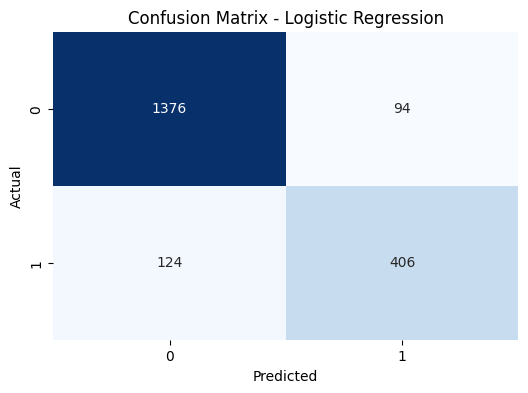

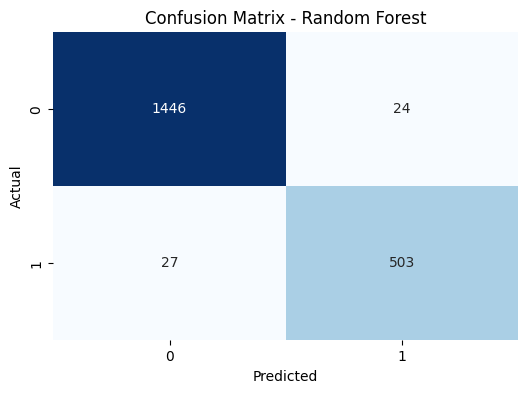

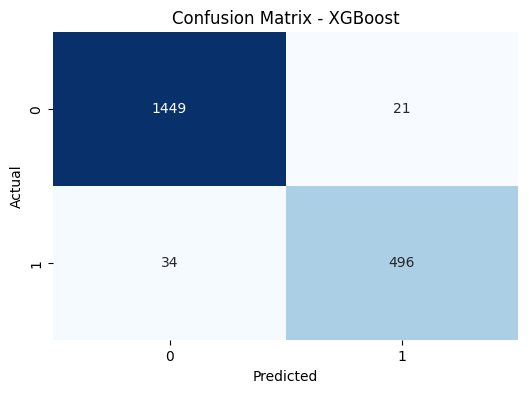

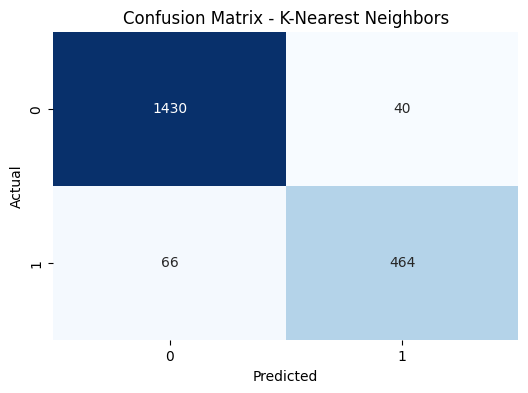

In [61]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

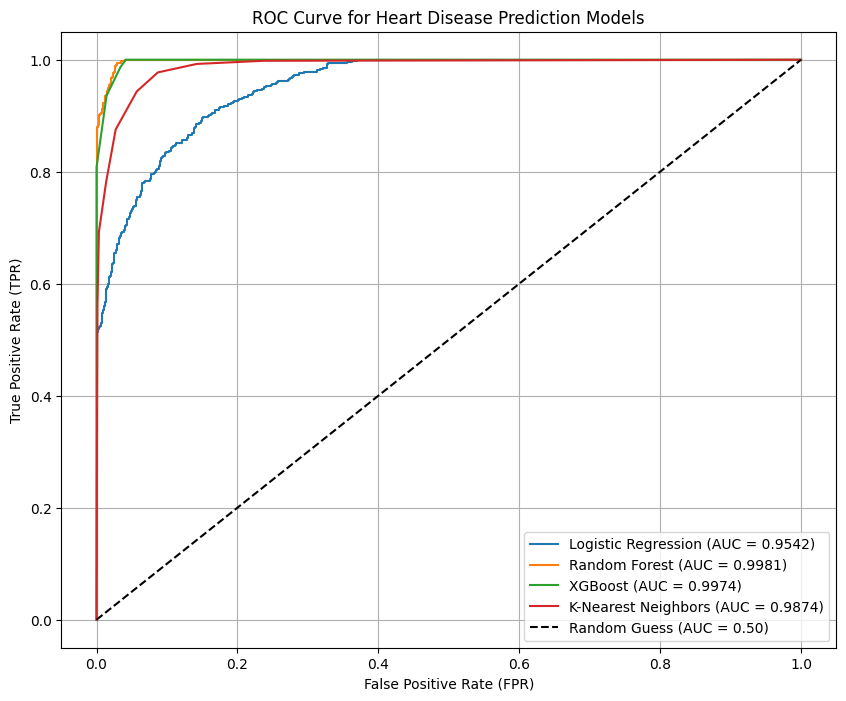

In [62]:
# Get predicted probabilities for the positive class (Risk = 1)
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.4f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction Models')
plt.legend()
plt.grid(True)
plt.show()

# **Model Deployment Using Prompt Engineering**

In [67]:
# Assuming best_rf_model is your chosen best model
# You would replace this with whichever model you decide is best

def predict_heart_disease_risk(model, patient_details):
    """
    Predicts heart disease risk based on patient details using the trained model.

    Args:
        model: The trained machine learning model.
        patient_details (dict): A dictionary containing patient's features.

    Returns:
        int: Predicted risk (0 for low risk, 1 for high risk).
    """
    # Create a DataFrame from patient details, ensuring the correct order of columns
    input_data = pd.DataFrame([patient_details])

    # Ensure the order of columns in input_data matches the training data
    # This is important for consistent predictions
    input_data = input_data[X_train.columns]

    # Make prediction
    prediction = model.predict(input_data)

    return prediction[0]



import re

def extract_details_from_prompt(prompt):
    """
    Extracts patient details from a natural language prompt using regex.
    This is a simplified extractor and may not handle all variations.
    """
    details = {}
    # Example of extracting Age
    age_match = re.search(r"Age:\s*(\d+)", prompt, re.IGNORECASE)
    if age_match:
        details['Age'] = int(age_match.group(1))

    # Example of extracting Gender
    gender_match = re.search(r"Gender:\s*(Male|Female)", prompt, re.IGNORECASE)
    if gender_match:
        details['Gender'] = gender_match.group(1).capitalize()

    # Example of extracting Cholesterol
    cholesterol_match = re.search(r"Cholesterol:\s*(\d+(\.\d+)?)", prompt, re.IGNORECASE)
    if cholesterol_match:
        details['Cholesterol'] = float(cholesterol_match.group(1))

    # Example of extracting Blood Pressure
    bloodpressure_match = re.search(r"Blood Pressure:\s*(\d+(\.\d+)?)", prompt, re.IGNORECASE)
    if bloodpressure_match:
        details['BloodPressure'] = float(bloodpressure_match.group(1))

    # Example of extracting Max Heart Rate
    maxheartrate_match = re.search(r"Max Heart Rate:\s*(\d+(\.\d+)?)", prompt, re.IGNORECASE)
    if maxheartrate_match:
        details['MaxHeartRate'] = float(maxheartrate_match.group(1))


    # Example of extracting Exercise
    exercise_match = re.search(r"Exercise:\s*(Yes|No)", prompt, re.IGNORECASE)
    if exercise_match:
        details['Exercise'] = exercise_match.group(1).capitalize()

    # Example of extracting Smoking
    smoking_match = re.search(r"Smoking:\s*(Yes|No)", prompt, re.IGNORECASE)
    if smoking_match:
        details['Smoking'] = smoking_match.group(1).capitalize()

    # Example of extracting Family History
    familyhistory_match = re.search(r"Family History:\s*(Yes|No)", prompt, re.IGNORECASE)
    if familyhistory_match:
        details['FamilyHistory'] = familyhistory_match.group(1).capitalize()


    return details

def process_simple_query(query, ml_model, scaler, feature_columns, categorical_encoding_map):
    """
    Processes a natural language query without an external API.
    """
    # Extract details from the query
    patient_details_raw = extract_details_from_prompt(query)

    # Process and format the extracted details for the ML model
    patient_details_processed = {}
    missing_details = []
    numerical_cols_for_scaling_names = ['Cholesterol', 'BloodPressure', 'MaxHeartRate'] # Columns the scaler was fitted on

    for col in feature_columns:
        raw_value = patient_details_raw.get(col, None)

        # Handle numerical features
        if col in ['Age'] + numerical_cols_for_scaling_names: # Include Age here for processing raw value
             if raw_value is not None:
                try:
                    patient_details_processed[col] = float(raw_value)
                except ValueError:
                    return f"Invalid value for {col}: '{raw_value}'. Please provide a number."
             else:
                 missing_details.append(col)

        # Handle categorical features
        elif col in ['Gender', 'Exercise', 'Smoking', 'FamilyHistory']:
            if raw_value is not None:
                cleaned_value = raw_value.strip().lower()
                if cleaned_value in categorical_encoding_map[col]:
                     patient_details_processed[col] = categorical_encoding_map[col][cleaned_value]
                else:
                     return f"Invalid value for {col}: '{raw_value}'. Please provide a valid option."
            else:
                missing_details.append(col)


    # Check if any required details are missing
    if missing_details:
        return f"The following patient details are missing from your query: {', '.join(missing_details)}. Please provide values for these."

    # Apply scaling only to the numerical features the scaler was fitted on
    numerical_data_to_scale = [[patient_details_processed[col] for col in numerical_cols_for_scaling_names]] # Create 2D array

    try:
        scaled_numerical_data = scaler.transform(numerical_data_to_scale)
        # Update the processed patient details with scaled values
        for i, col in enumerate(numerical_cols_for_scaling_names):
             patient_details_processed[col] = scaled_numerical_data[0][i]

    except Exception as e:
         print(f"Error scaling numerical features: {e}")
         return "Could not scale numerical features. Please check the provided values."


    # Ensure all expected feature columns are present in the processed data
    full_patient_details = {}
    for col in feature_columns:
        full_patient_details[col] = patient_details_processed.get(col, 0) # Use 0 as a default for missing if not caught earlier


    # Make prediction using the ML model
    predicted_risk = predict_heart_disease_risk(ml_model, full_patient_details)

    # Generate simple natural language explanation
    if predicted_risk == 1:
        return "Based on the provided details, the model predicts a **high risk** of heart disease."
    else:
        return "Based on the provided details, the model predicts a **low risk** of heart disease."


# --- Example Usage with a Simple Natural Language Prompt ---

# Define the expected feature columns in the order the model expects them
expected_feature_columns = ['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'MaxHeartRate', 'Exercise', 'Smoking', 'FamilyHistory']

# Define the categorical encoding map used during preprocessing
categorical_encoding_map = {
    'Gender': {'female': 0, 'male': 1},
    'Exercise': {'no': 0, 'yes': 1},
    'Smoking': {'no': 0, 'yes': 1},
    'FamilyHistory': {'no': 0, 'yes': 1}
}


# Example prompt
user_prompt_simple = "Given the patient details (Age: 65, Gender: Female, Cholesterol: 220, Blood Pressure: 130, Max Heart Rate: 145, Exercise: Yes, Smoking: No, Family History: No), predict the risk of heart disease."

# Process the natural language query
prediction_explanation_simple = process_simple_query(
    user_prompt_simple,
    best_rf_model, # Use your chosen best model
    scaler, # Use the scaler fitted on the training data
    expected_feature_columns,
    categorical_encoding_map
)

# Display the result
print(prediction_explanation_simple)

Based on the provided details, the model predicts a **high risk** of heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [70]:
# Example Query 3 - Constructed from user-provided details
# Patient details: Age: 45, Gender: Male, Cholesterol: 180, Blood Pressure: 150, Max Heart Rate: 160, Exercise: Yes, Smoking: No, Family History: No

# Construct the natural language prompt
user_prompt_3 = "Is a 45-year-old patient with a Cholesterol of 180, Blood Pressure of 150, Max Heart Rate of 160, who Exercises: Yes, Smokes: No, and has Family History: No, at risk of heart disease?"

prediction_explanation_3 = process_simple_query(
    user_prompt_3_reliable, # Use the reliably parsable prompt format
    best_rf_model, # Use your chosen best model
    scaler, # Use the scaler fitted on the training data
    expected_feature_columns,
    categorical_encoding_map
)
print(prediction_explanation_3)

Based on the provided details, the model predicts a **low risk** of heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [74]:
# Use the reliable prompt format
user_prompt_to_predict = "Given the patient details (Age: 55, Gender: Female, Cholesterol: 200, Blood Pressure: 150, Max Heart Rate: 160, Exercise: Yes, Smoking: yes, Family History: No), predict the risk of heart disease."

prediction_explanation = process_simple_query(
    user_prompt_to_predict,
    best_rf_model, # Use your chosen best model
    scaler, # Use the scaler fitted on the training data
    expected_feature_columns,
    categorical_encoding_map
)
print(prediction_explanation)

Based on the provided details, the model predicts a **high risk** of heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

